In [1]:
import numpy as np 
import pandas as pd
from pyGRNN import GRNN
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
def dataformat(pathname):
    df = pd.read_excel(pathname)
    df2 = df.drop(columns=['Country Name', 'Country Code'])
    df2 = df2.dropna(axis=1, how='all')
    
    df3 = df2[[column for column in df2 if column not in ['GDP growth (annual %)']] + ['GDP growth (annual %)']]
    
    return df3

In [4]:
def performance_metrics(y_test, y_pred):
    
    sign1 = np.sign(np.array(y_test[1:]) - np.array(y_test[:-1]))
    sign2 = np.sign(np.array(y_pred[1:]) - np.array(y_pred[:-1]))
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test )) *100
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mda = np.mean((sign1 == sign2).astype(int))
    mean = np.mean(y_test)
    si = (rmse/mean)*100
    
    print("RMSE: ", rmse)
    print("MAPE: ", mape)
    print("MAE: ", mae)
    print("Scatter Index: ", si)
    print("MDA: ", mda)
    print("Mean of actual: ", mean)

In [5]:
data = dataformat('/Users/farhanhabibie/Desktop/Farhan Thesis Code /UG-Project-Farhan/Multivariate More.xlsx')

In [6]:
data2 = data.set_index('Year')

In [7]:
data3 = data2.fillna(data2.mean())
data3.drop(data3.tail(1).index,inplace=True) #remove last row

In [8]:
X = data3[['Unemployment, female (% of female labor force) (modeled ILO estimate)', 'Foreign direct investment, net outflows (BoP, current US$).1', 'Portfolio investment, net (BoP, current US$).1', 'Foreign direct investment, net inflows (BoP, current US$).1', 'Portfolio equity, net inflows (BoP, current US$).1', 'S&P Global Equity Indices (annual % change)', 'Market capitalization of listed domestic companies (current US$)', 'Market capitalization of listed domestic companies (% of GDP)', 'Listed domestic companies, total', 'Stocks traded, turnover ratio of domestic shares (%)', 'Portfolio investment, bonds (PPG + PNG) (NFL, current US$)', 'Domestic credit to private sector by banks (% of GDP)', 'Bank liquid reserves to bank assets ratio (%)', 'Total reserves in months of imports', 'Claims on other sectors of the domestic economy (annual growth as % of broad money)', 'Net domestic credit (current LCU)', 'Net foreign assets (current LCU)', 'Broad money (current LCU)', 'Interest rate spread (lending rate minus deposit rate, %)', 'Claims on central government, etc. (% GDP)', 'Claims on other sectors of the domestic economy (% of GDP)', 'Domestic credit provided by financial sector (% of GDP)', 'Domestic credit to private sector (% of GDP)', 'Depth of credit information index (0=low to 8=high)', 'Private credit bureau coverage (% of adults)', 'Public credit registry coverage (% of adults)', 'Strength of legal rights index (0=weak to 12=strong)', 'Trade in services (% of GDP)', 'Imports of goods and services (BoP, current US$)', 'Foreign direct investment, net outflows (BoP, current US$)', 'Current account balance (% of GDP)', 'Net errors and omissions (BoP, current US$)', 'Exports of goods and services (BoP, current US$)', 'Goods exports (BoP, current US$)', 'Exports of goods, services and primary income (BoP, current US$)', 'Foreign direct investment, net inflows (BoP, current US$)', 'Portfolio equity, net inflows (BoP, current US$)', 'External debt stocks, total (DOD, current US$)', 'External debt stocks (% of GNI)', 'General government final consumption expenditure (annual % growth)', 'Exports of goods and services (annual % growth)', 'Changes in inventories (current US$)', 'External balance on goods and services (constant LCU)', 'Agriculture, forestry, and fishing, value added (annual % growth)', 'Adjusted savings: education expenditure (current US$)', 'Adjusted savings: carbon dioxide damage (current US$)', 'Adjusted savings: carbon dioxide damage (% of GNI)', 'Adjusted savings: consumption of fixed capital (current US$)', 'Adjusted savings: consumption of fixed capital (% of GNI)', 'Adjusted savings: mineral depletion (current US$)', 'Adjusted net national income (current US$)', 'Adjusted net national income per capita (annual % growth)', 'Discrepancy in expenditure estimate of GDP (constant LCU)', 'GDP, PPP (current international $)', 'GDP per capita growth (annual %)', 'GNI, Atlas method (current US$)', 'GNI growth (annual %)', 'GNI per capita, Atlas method (current US$)', 'GNI per capita growth (annual %)', 'Net primary income (Net income from abroad) (current US$)', 'Taxes less subsidies on products (current US$)', 'Taxes less subsidies on products (current LCU)', 'Net secondary income (Net current transfers from abroad) (current US$)', 'Net secondary income (Net current transfers from abroad) (current LCU)', 'PPP conversion factor, GDP (LCU per international $)']]
#X = data3.iloc[:,:-1]
y = data3.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [10]:
#StandardScaler as data follows normal dist

scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [11]:
model = GRNN(kernel='RBF',calibration='none', sigma=2.46)
model.fit(X_train_s, y_train)

GRNN(calibration='none', sigma=2.46)

In [12]:
y_pred = model.predict(X_test_s)

RMSE:  0.7388298603060988
MAPE:  12.038970305967943
MAE:  0.6366000986196311
Scatter Index:  13.68123364312169
MDA:  0.7272727272727273
Mean of actual:  5.400316079519256


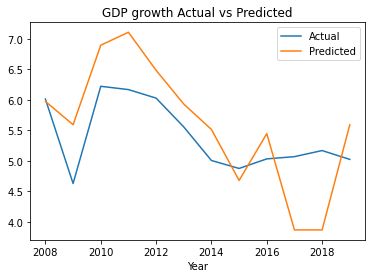

In [13]:
#Outputs
df_compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_compare.plot(title='GDP growth Actual vs Predicted')
performance_metrics(y_test, y_pred)

In [14]:
def tune_n(X, y):
    hyperparam = {'kernel' : ["RBF"],
                  'sigma' : list(np.arange(1, 5, 0.01)),
                  'calibration' : ['None']
                  }
    
    model = GRNN()
    
    gscv = GridSearchCV(estimator=model, param_grid=hyperparam,
                       scoring='neg_mean_squared_error',
                       verbose=1, cv=5, return_train_score=True)
    
    gscv.fit(X, y)
    
    print("best hyperparam:", gscv.best_params_)
    

In [15]:
#tune_n(X_train_s, y_train) 

In [16]:
"""
Feature Selection Solve
"""

from pyGRNN import feature_selection as FS

featurenames = X.columns.values.tolist()

#selector = FS.Isotropic_selector(bandwidth = 'rule-of-thumb')
#selector.feat_selection(X.to_numpy(), y.ravel(), feature_names=featurenames, strategy='bfs', stop_criterion='first_min')

In [17]:
from pyGRNN import feature_selection as FS

#selector2 = FS.Isotropic_selector(bandwidth='rule-of-thumb')
#selector2.feat_selection(X.to_numpy(), y.ravel(), feature_names=featurenames, strategy='ffs', stop_criterion='first_min')

In [18]:
"""
Distribution plot
"""

#data2.plot.hist(legend=False, figsize=(50,50))

'\nDistribution plot\n'

In [19]:
"""
Learning Curve to detect overfit/underfit

Method from: 

https://vitalflux.com/learning-curves-explained-python-sklearn-example/amp/
and
https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html#:~:text=Learning%20curves%20can%20be%20generated,see%20in%20the%20following%20examples.
"""

pipeline = make_pipeline(preprocessing.StandardScaler(), GRNN(kernel='RBF',calibration='none', sigma=2.46))

In [20]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train,
                                                      y=y_train, cv=10,
                                                      train_sizes=np.linspace(0.1, 1.0, 10), 
                                                       scoring='r2')

In [21]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [22]:
train_mean

array([0.64244487, 0.54626076, 0.6794766 , 0.73534475, 0.76783083,
       0.78485581, 0.79375537, 0.86635451, 0.86601289, 0.88280869])

In [23]:
test_mean

array([-89.81443198, -89.65074516, -54.51483225, -52.47065555,
       -52.00737231, -50.96769945, -50.95691634, -23.44683478,
        -1.84884518,  -1.81265763])

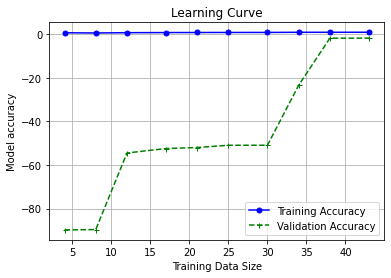

In [26]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Learning Curve for GRNN Multivariate')

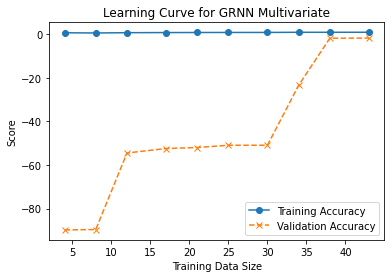

In [29]:
plt.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
plt.xlabel('Training Data Size')
plt.plot(train_sizes, test_mean, marker='x', linestyle='--', label='Validation Accuracy')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve for GRNN Multivariate')